In [1]:
import numpy as np
from scipy import signal
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


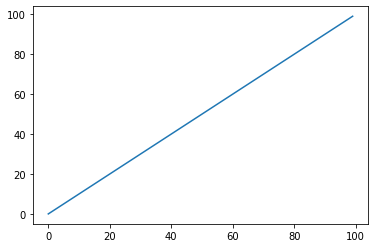

In [5]:
x = list(range(0, 100))
l = len(x)

print(x)

plt.plot(x)
plt.show()

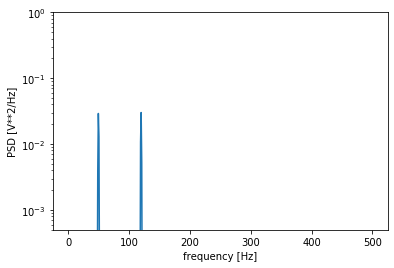

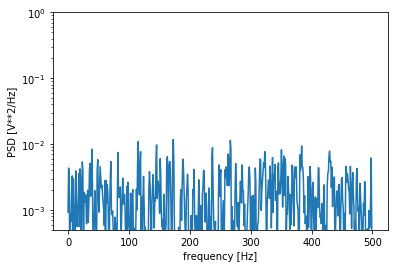

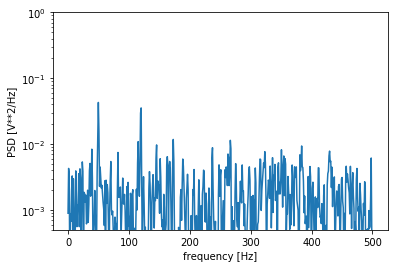

In [151]:
f_clean_y, f_clean_den = signal.welch(f_clean, fs, window='hann', nperseg=1024, scaling='density')
plt.semilogy(f_clean_y, f_clean_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

f_noise_y, f_noise_den = signal.welch(f_noise, fs, window='hann', nperseg=1024, scaling='density')
plt.semilogy(f_noise_y, f_noise_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

f_y, f_den = signal.welch(f, fs, window='hann', nperseg=1024, scaling='density')
plt.semilogy(y, f_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

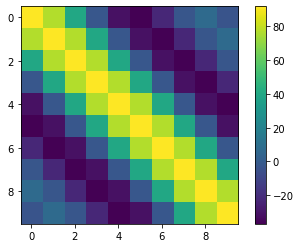

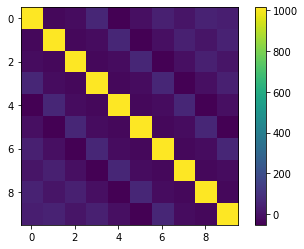

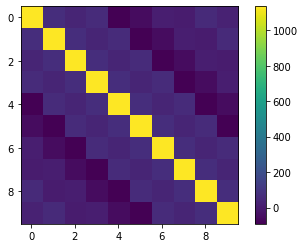

Noise only: 0.9929573132082672
Noise and signal: 1.124804959443559
Diff: 0.13184764623529177


In [154]:
################# Method 1 #################
def autoc(x, l):
    lam = 0
    for m in range(0, len(x)):
        i = m-l
        if i < 0:
            lam += (x[m] * np.mean(x))
        else:
            lam += (x[m] * x[i]) 
#     return lam / np.mean(x)          # normalized
    return lam

def cova(x):
    size = 10
    m = np.zeros((size, size))
    for i in range(0, size):
        for j in range(0, size):
            m[i][j] = autoc(x, abs(i-j))
    return m

################# Method 2 #################
# def cova(x):
#     size = 10
#     m = np.zeros((size, size))
#     for i in range(0, size):
#         for j in range(0, size):
#             co = signal.correlate(x, x, mode='same', method='auto')
#             m[i][j] = co[abs(i-j)]
#     return m

# ################# Method 3 #################
# def serial_corr(x, lag):
#     n = len(x)
#     y1 = x[lag:]
#     y2 = x[:n-lag]
#     corr = np.corrcoef(y1, y2, )[0, 1]
#     return corr

# def cova(x):
#     size = 10
#     m = np.zeros((size, size))
#     for i in range(0, size):
#         for j in range(0, size):
#             m[i][j] = serial_corr(x, abs(i-j))
# #             m[i][j] = co[abs(i-j)]
#     return m

c_clean = cova(f_clean)
c_noise = cova(f_noise)
c = cova(f)

plt.imshow(c_clean)
plt.colorbar()
plt.show()

plt.imshow(c_noise)
plt.colorbar()
plt.show()

plt.imshow(c)
plt.colorbar()
plt.show()

def test1(x):
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.max(eig)
    eig_min = np.min(eig)
    return eig_max/eig_min
    
print(f"Noise only: {test1(c_noise)}")
print(f"Noise and signal: {test1(c)}")
print(f"Diff: {test1(c)-test1(c_noise)}")

# print(test2(c_noise))
# print(test2(c))

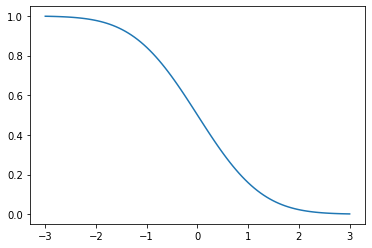

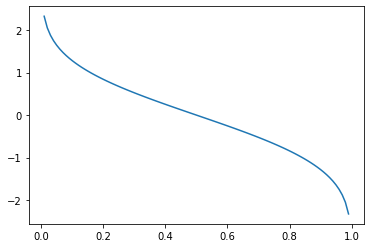

In [27]:
from scipy import special as sp
# def qfunc(x):
#     return 0.5*sp.erf(x/np.sqrt(2))

# def invQfunc(x):
#     return np.sqrt(2)*sp.erfinv(2*x)


def qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))

def invQfunc(x):
    return np.sqrt(2)*sp.erfinv(1-2*x)

x = np.linspace(-3, 3, 100)

plt.plot(x, qfunc(x))
plt.show()

x = np.linspace(0, 1, 100)

plt.plot(x, invQfunc(x))
plt.show()